In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as c; import astropy.units as u
from scipy.integrate import odeint

In [6]:
# parameter
k = 0 # 0: flat universe 
Omega_M = 0.3 
Omega_L = 0.7
H0 = (70*u.km/u.s/u.Mpc).to(1/u.Gyr) # Hubble constant 
age_uni = 13.4 # The maximum look back time, 
               #value chosen slightly shorter than the age of the universe, which is about 13.796±0.029 Gyr(From wikipedia)

In [3]:
def cosmological_calculator(k, Omega_M, Omega_L, H0, age_uni, step):
    # solve the evolution of scale factor with respect to look back time. 
    def dadt(a,t): 
        Omega_0 = Omega_M+Omega_L
        return -H0*np.sqrt(Omega_M/a+Omega_L*a**2+1-Omega_0)
    a = []
    t = []
    aa=1 #initial condition
    time = 0
    while time<age_uni:
        t.append(time)
        if time==0:
            aa = 1
        else:    
            aa = aa + dadt(aa,time)*step*u.Gyr
        time += step
        a.append(aa)
    a = np.array(a)
    
    # calculation of physical quantity
    z = 1/a - 1  #redshift
    H = H0*np.sqrt(Omega_M/a**3+Omega_L)  #Hubble parameter
    D_M = []
    for zz in z:
        z_p = np.linspace(0,zz,100)
        f = 1/np.sqrt(Omega_M*(1+z_p)**3+Omega_L)
        D_M.append(c.c/H0*np.trapz(f, z_p)/u.m)
    D_M = np.array(D_M)  # proper distance
    vol_e = c.c/H*D_M**2  #volume element
    cum_vol = 4*np.pi*D_M**3/3  #the cumulative volume
    
    # unit conversion
    t = t*u.Gyr
    H = H.to(u.km/u.s/u.Mpc)
    D_M = (D_M*u.m).to(u.Gpc)
    vol_e = (vol_e*u.m**2).to(u.Gpc**3)
    cum_vol = (cum_vol*u.m**3).to(u.Gpc**3)
    return t,a,z,H,D_M,vol_e,cum_vol

In [4]:
# Running cosmological_calculator using three time steps, which is 1, 0.1, 0.01 Gyr. 
t1,a1,z1,H1,D_M1,vol_e1,cum_vol1 = cosmological_calculator(k, Omega_M, Omega_L, H0, age_uni, 1)
t01,a01,z01,H01,D_M01,vol_e01,cum_vol01 = cosmological_calculator(k, Omega_M, Omega_L, H0, age_uni, 0.1)
t001,a001,z001,H001,D_M001,vol_e001,cum_vol001 = cosmological_calculator(k, Omega_M, Omega_L, H0, age_uni, 0.001)

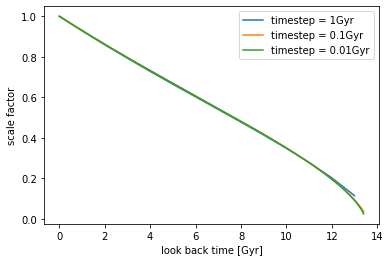

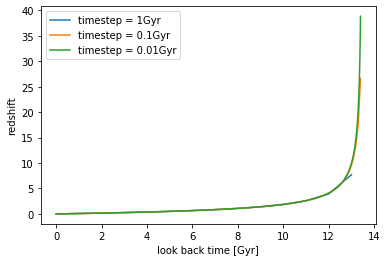

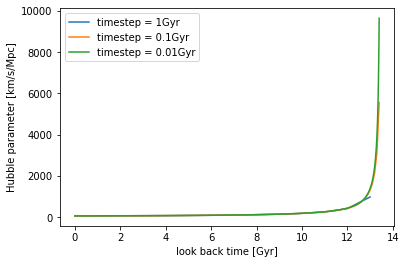

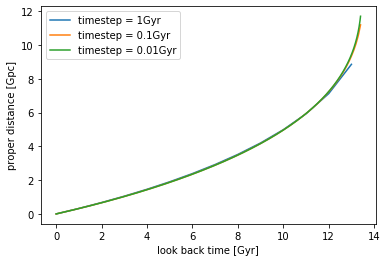

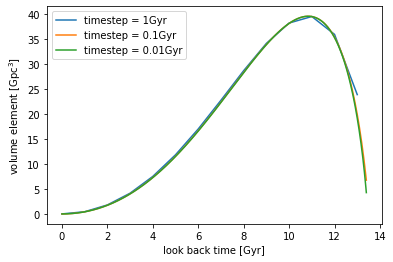

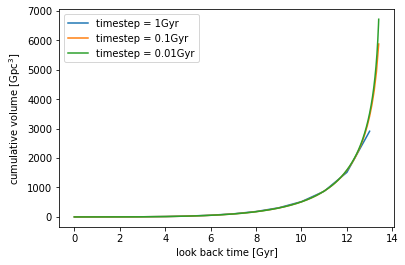

In [5]:
plt.figure(1)
plt.plot(t1, a1, label = 'timestep = 1Gyr')
plt.plot(t01, a01, label = 'timestep = 0.1Gyr')
plt.plot(t001, a001, label = 'timestep = 0.01Gyr')
plt.xlabel('look back time [Gyr]')
plt.ylabel('scale factor')
plt.legend()
plt.figure(2)
plt.plot(t1, z1, label = 'timestep = 1Gyr')
plt.plot(t01, z01, label = 'timestep = 0.1Gyr')
plt.plot(t001, z001, label = 'timestep = 0.01Gyr')
plt.xlabel('look back time [Gyr]')
plt.ylabel('redshift')
plt.legend()
plt.figure(3)
plt.plot(t1, H1, label = 'timestep = 1Gyr')
plt.plot(t01, H01, label = 'timestep = 0.1Gyr')
plt.plot(t001, H001, label = 'timestep = 0.01Gyr')
plt.xlabel('look back time [Gyr]')
plt.ylabel('Hubble parameter [km/s/Mpc]')
plt.legend()
plt.figure(4)
plt.plot(t1, D_M1, label = 'timestep = 1Gyr')
plt.plot(t01, D_M01, label = 'timestep = 0.1Gyr')
plt.plot(t001, D_M001, label = 'timestep = 0.01Gyr')
plt.xlabel('look back time [Gyr]')
plt.ylabel('proper distance [Gpc]')
plt.legend()
plt.figure(5)
plt.plot(t1, vol_e1, label = 'timestep = 1Gyr')
plt.plot(t01, vol_e01, label = 'timestep = 0.1Gyr')
plt.plot(t001, vol_e001, label = 'timestep = 0.01Gyr')
plt.xlabel('look back time [Gyr]')
plt.ylabel('volume element [Gpc$^3$]')
plt.legend()
plt.figure(6)
plt.plot(t1, cum_vol1, label = 'timestep = 1Gyr')
plt.plot(t01, cum_vol01, label = 'timestep = 0.1Gyr')
plt.plot(t001, cum_vol001, label = 'timestep = 0.01Gyr')
plt.xlabel('look back time [Gyr]')
plt.ylabel('cumulative volume [Gpc$^3$]')
plt.legend()

These results all converge. But the simulation run with timestep=1Gyr does not behave as well as other two, especilly at late look back time.

In [6]:
# calculate the total comoving volume of the universe visible to us out to z=1
from scipy import interpolate
com_vol = interpolate.interp1d(z001,cum_vol001)
vol = com_vol(1)
print("The total comoving volume of the universe visible to us out to z=1 is %f Gpc^3"%vol)

The total comoving volume of the universe visible to us out to z=1 is 151.057728 Gpc^3


In [8]:
t = interpolate.interp1d(z001,t001)
ti = t(6.3)
ti

array(12.60603064)

In [43]:
(1/2*(9/1e8)**2*4e9*u.yr).to(u.s)*c.c*(1-1/2*(9/1e8)**2)

<Quantity 1.53263834e+11 m>

In [45]:
(np.pi*c.G*0.66*u.Gyr/2/c.c/(0.04*u.m**2/u.kg)/np.log(10)).decompose()

<Quantity 0.0790793>